In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

#### 创建数据

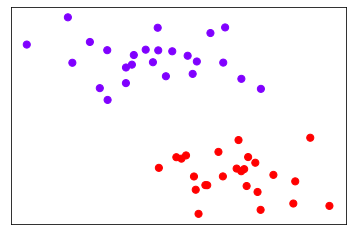

In [2]:
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plt.xticks([])
plt.yticks([])
plt.show()

#### 构建子图

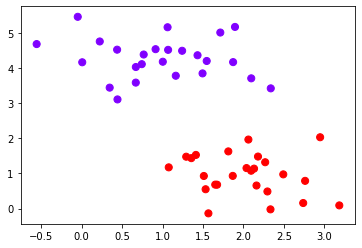

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
# 获得最大最小值之间的的30个值
axisx = np.linspace(xlim[0], xlim[1], 30)
axisy = np.linspace(ylim[0], ylim[1], 30)

In [4]:
axisy, axisx =np.meshgrid(axisy, axisx)
axisx.shape

(30, 30)

In [5]:
xy = np.vstack([axisx.ravel(), axisy.ravel()]).T

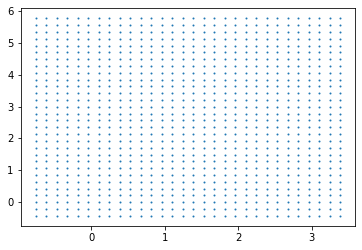

In [6]:
plt.scatter(xy[:, 0], xy[:, 1], s=1, cmap="rainbow")

#### 理解函数meshgrid和vstack的作用

In [7]:
a = np.array([1, 2, 3])
b = np.array([7, 8])
v1, v2 = np.meshgrid(a, b)

In [8]:
v1

array([[1, 2, 3],
       [1, 2, 3]])

In [9]:
v2

array([[7, 7, 7],
       [8, 8, 8]])

In [10]:
v = np.vstack([v1.ravel(), v2.ravel()]).T
v

array([[1, 7],
       [2, 7],
       [3, 7],
       [1, 8],
       [2, 8],
       [3, 8]])

#### 建模

In [11]:
clf = SVC(kernel='linear').fit(X, y)
# 计算网格点到分类超平面的距离　Z
Z = clf.decision_function(xy).reshape(axisx.shape)

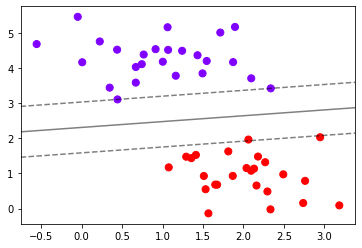

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
ax = plt.gca()

ax.contour(axisx, axisy, Z
           , colors="k"
           , levels=[-1,0,1]
           , alpha=0.5
           , linestyles=["--","-","--"])
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.show()

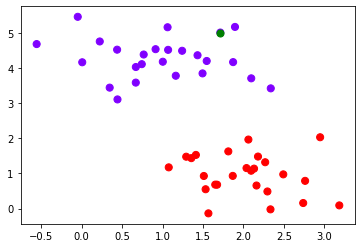

In [13]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plt.scatter(X[10,0],X[10,1],c="green",s=50,cmap="rainbow")

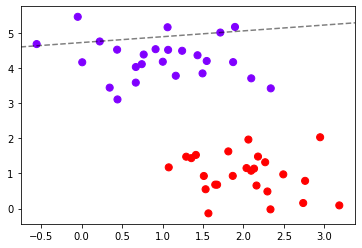

In [14]:
clf.decision_function(X[10].reshape(1,2))
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
ax = plt.gca()
ax.contour(axisx,axisy,Z
            , colors="k"
            , levels=[-3.33917354]
            , alpha=0.5
            , linestyles=["--"]
          )

#### 将上述过程包装成函数：

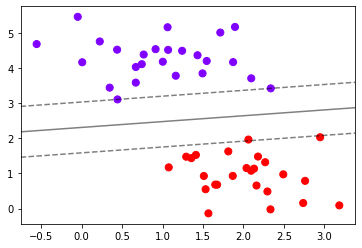

In [15]:
def plot_svc_decision_function(model,ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0],xlim[1],30)
    y = np.linspace(ylim[0],ylim[1],30)
    Y,X = np.meshgrid(y,x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    ax.contour(X, Y, P
               , colors="k"
               , levels=[-1,0,1]
               , alpha=0.5
               , linestyles=["--","-","--"])
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
#则整个绘图过程可以写作：
clf = SVC(kernel = "linear").fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap="rainbow")
plot_svc_decision_function(clf)

In [16]:
# 预测
clf.predict(X)

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

In [17]:
# 评分
clf.score(X, y)

1.0

In [18]:
# 支持向量
clf.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [19]:
clf.n_support_

array([2, 1], dtype=int32)

#### 非线性

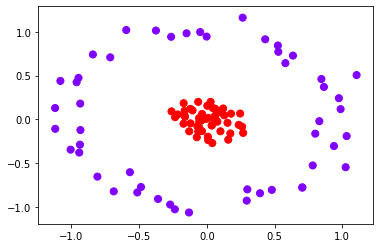

In [21]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, factor=0.1, noise=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plt.savefig("./imgs/非线性.png")
plt.show()

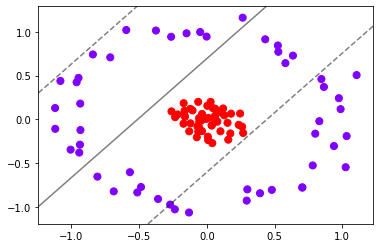

In [22]:
## 绘制决策边界
clf = SVC(kernel="linear").fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plot_svc_decision_function(clf)
plt.savefig("./imgs/非线性决策边界.png")

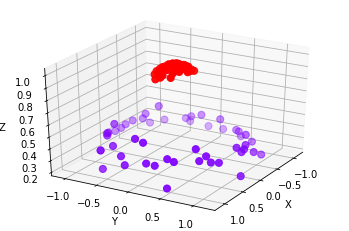

In [25]:
### 升高维度
r = np.exp(-(X**2).sum(1))
rlim = np.linspace(min(r), max(r))

from mpl_toolkits import mplot3d

def plt_3d(elev=30, azim = 30, X= X, y = y):
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap = "rainbow")
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.savefig("./imgs/映射空间.png")
    plt.show()
    
plt_3d()


## kernel trick

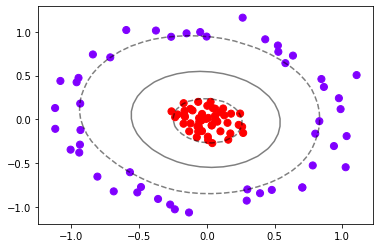

In [24]:
## 绘制决策边界
clf = SVC(kernel="rbf").fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="rainbow")
plot_svc_decision_function(clf)
plt.savefig("./imgs/核技巧.png")